# 图像阈值

    ret,dst = cv2.threshold(src,thresh,maxval,type)
+ src: 输入图
+ dst: 输出图
+ thresh: 阈值
+ maxval: 当像素值超过了阈值（或小于阈值，根据type来决定），所赋予的值
+ type: 二值化操作的类型，包含5种类型：

 二值
 + cv2.THRESH_BINARY: 超过阈值部分取maxval，否则取0
 + cv2.THRESH_BINARY_INV: THRESH_BINARY的反转
 
 截断值
 
 + cv2.THRESH_TRUNC: 大于阈值部分设为阈值，否则不变
 
 暗点变0(tozero)
 
 + cv2.THRESH_TOZERO: 大于阈值部分不改变，否则设为0
 + cv2.THRESH_TOZERO_INV: THRESH_TOZERO的反转

In [1]:
import cv2 # opencv默认读取格式是BGR的而不是RGB
import matplotlib.pyplot as plt
import numpy as np
# 魔法指令notebook中不必调用plt.show()函数了
%matplotlib inline

In [2]:
img = cv2.imread('cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(414, 500)

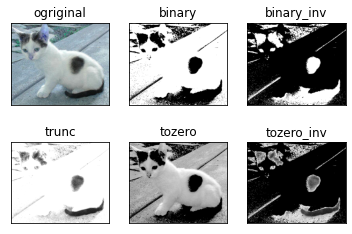

In [3]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)

titles = ['ogriginal','binary','binary_inv','trunc','tozero','tozero_inv']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# 图像平滑（滤波）

In [4]:
img = cv2.imread("lenaNoise.png")
cv2.imshow('lenaNoise',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 均值滤波

In [5]:
# 简单的平均卷积操作
# blur：模糊、失去焦点
blur = cv2.blur(img,(3,3))
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 方框滤波

In [6]:
# 基本和均值滤波一样，可以选择归一化
# -1: 颜色通道表示一致
# (3,3)卷积核尺寸
# normalize：不归一化的话可能越界、归一化后和均值滤波一样
box = cv2.boxFilter(img,-1,(3,3),normalize=True)
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 越界的像素点全取255，所以图像白色比较多
box = cv2.boxFilter(img,-1,(3,3),normalize=False)
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 高斯滤波

In [8]:
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img,(5,5),1)
cv2.imshow('高斯滤波',aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 中值滤波

In [9]:
# 相当于用中值代替（区域内排序后的中值）
# 效果很好
median = cv2.medianBlur(img,5)
cv2.imshow('medianBlur',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
## 展示所有的
# 均值、高斯、中值
res = np.hstack((blur,aussian,median))
# res = np.vstack((blur,aussian,median))
cv2.imshow('median vs average',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 形态学（morphology）

## 腐蚀操作

In [11]:
# 腐蚀操作一般是2值的
# 腐蚀：领域被蚕食
# 将图像中的高亮区域或白色部分进行缩减细化,其运行结果图比原图的高亮区域更小.
img = cv2.imread('dige.png')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
kernel = np.ones((5,5),np.uint8)
# iterations：迭代次数
erosion = cv2.erode(img,kernel,iterations=1)
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
pie = cv2.imread('pie.png')
kernel = np.ones((30,30),np.uint8)
erosion_1 = cv2.erode(pie,kernel,iterations=1)
erosion_2 = cv2.erode(pie,kernel,iterations=2)
erosion_3 = cv2.erode(pie,kernel,iterations=3)
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 膨胀操作

In [14]:
# 腐蚀的逆操作
img = cv2.imread('dige.png')

In [15]:
dige_erosion = cv2.erode(img,kernel,iterations=1)
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
kernel = np.ones((3,3),np.uint8)
dige_dilate = cv2.dilate(dige_erosion,kernel,iterations=1)
cv2.imshow('dilate',dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()
# 图像线条变粗了

In [17]:
pie = cv2.imread('pie.png')
kernel = np.ones((30,30),np.uint8)
dilate_1 = cv2.dilate(pie,kernel,iterations=1)
dilate_2 = cv2.dilate(pie,kernel,iterations=2)
dilate_3 = cv2.dilate(pie,kernel,iterations=3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 开运算与闭运算

## 开：先腐蚀再膨胀

In [18]:
# morph： (使) 改变
img = cv2.imread('dige.png')
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
cv2.imshow("opening",opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 闭：先膨胀再腐蚀

In [19]:
img = cv2.imread('dige.png')
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
cv2.imshow("closing",closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 梯度运算

In [20]:
# 梯度 = 膨胀 - 腐蚀
pie = cv2.imread('pie.png')
kernel = np.ones((7,7),np.uint8)
dilate = cv2.dilate(pie,kernel,iterations=5)
erosion = cv2.erode(pie,kernel,iterations=5)
res = np.hstack((dilate,erosion))
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# morphology: 形态学
gradient = cv2.morphologyEx(pie,cv2.MORPH_GRADIENT,kernel)
cv2.imshow("gradient",gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 礼帽和黑帽

+ 礼帽：原始输入(带刺) - 开运算结果（不带刺），所以结果只剩下刺了
+ 黑帽：闭运算结果（粗刺） - 原始输入（细刺），结果刺几乎没有，剩下原始图片轮廓

In [22]:
img = cv2.imread('dige.png')
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
res = np.hstack((tophat,blackhat))
cv2.imshow("tophat & blackhat",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 图像梯度

## Sobel算子

In [24]:
# 检测边缘
img = cv2.imread('pie.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

    dst = cv2.Sobel(src,ddepth,dx,dy,ksize)
+ ddepth:图像深度，一般-1就可以
+ dx和dy：表示水平和数值方向
+ ksize：Sobel算子的大小

In [25]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [32]:
# 右边减左边，从下减上
# 白到黑是正数、黑到白就是负数了，所有负数会被截断成0，所以要取绝对值
# cv2.CV_64F能表示负数
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
cv_show(sobelx,'sobelx')

In [33]:
# dx = 1,dy = 0表示算水平的，不去算竖直的
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx,'sobelx')
# dx = 0,dy = 1表示相反
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
cv_show(sobely,'sobely')

In [43]:
# 分别计算x和y、再求和
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

# 不建议直接计算 dx = 1 ,dy =1
sobelxy_ = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy_ = cv2.convertScaleAbs(sobelxy_)

sobelxys = np.hstack((sobelxy,sobelxy_))
cv2.imshow(' vs  ',sobelxys)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
# lena图像展示效果
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

# 1.分别计算
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

# 2.直接计算（不建议）
sobelxy_ = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy_ = cv2.convertScaleAbs(sobelxy_)

sobelxys = np.hstack((img,sobelxy,sobelxy_))
cv_show(sobelxys,'0 vs 1 vs 2')

## Scharr算子

## laplacian(拉普拉斯)算子


In [56]:
# 不同算子的差异
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show(res,'res')

# Canny边缘检测

1. 使用`高斯滤波器`，以平滑图像，滤除噪声
2. 计算图像中每个像素点的梯度强度与方向
3. 应用非极大值抑制（Non-Maxumum Suppression），以消除边缘检测带来的杂散影响
4. 应用双阈值（Double-Threshold）检测来确定真实和潜在的边缘
5. 通过抑制孤立的弱边缘完成边缘检测